# Bivariate EDA Analisis

### Key Business Questions:

1.  **Seasonal & Source Dynamics:** 
    How does production efficiency shift across seasons for each energy source? Specifically, does the inverse relationship between Solar (summer-peak) and Wind (often winter-peak) provide grid stability?

2.  **Long-Term Trends:** 
    Is there an observable year-over-year growth in total production capacity from 2020 to 2024? (Excluding the incomplete 2025 data to ensure fair comparison).

3.  **Monthly Consistency:** 
    Are production patterns consistent across the same month in different years, or do we observe significant anomalies driven by external factors (e.g., extreme weather events)?

## Open the cleaned data

In [5]:
import pandas as pd

csv_filename = "cleaned-wind-and-solar-energy.csv"
df = pd.read_csv(csv_filename, index_col=0)

In [6]:
df.head()

,Source,Month_Name,Season,Production,Year,Month
0,Wind,November,Fall,5281,2025,11
1,Wind,November,Fall,3824,2025,11
2,Wind,November,Fall,3824,2025,11
3,Wind,November,Fall,6120,2025,11
4,Wind,November,Fall,4387,2025,11


## 1. **Seasonal & Source Dynamics:** 

**Business Question**
How does production efficiency shift across seasons for each energy source? Specifically, does the inverse relationship between Solar (summer-peak) and Wind (often winter-peak) provide grid stability?

In [70]:
# Datapoints and frequency

# How many observations belong to this Season–Source combination?
crosstab_source_season = pd.crosstab(df["Season"], df["Source"])
display(crosstab_source_season)

crosstab_source_season_percent = round(pd.crosstab(df["Season"], df["Source"], normalize="index") * 100, 2)
display(crosstab_source_season_percent)


Source,Solar,Wind
Season,,
Fall,1961,11149
Spring,2547,10694
Summer,4172,9075
Winter,698,11566


Source,Solar,Wind
Season,,
Fall,14.96,85.04
Spring,19.24,80.76
Summer,31.49,68.51
Winter,5.69,94.31


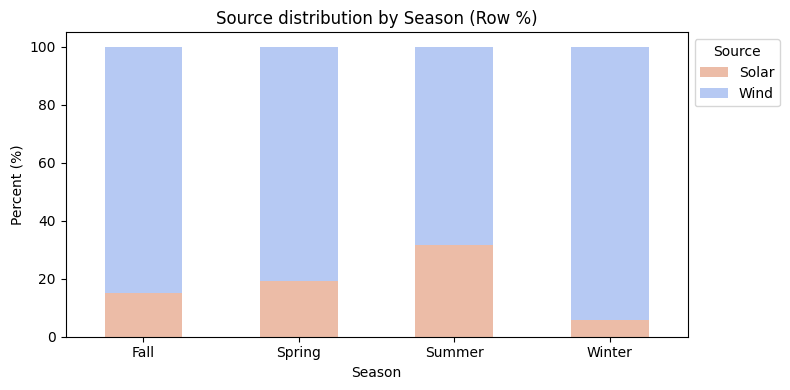

In [ ]:
import matplotlib.pyplot as plt
import seaborn.objects as so

colors = ["#ecbca7", "#b6c9f3"]  # Wind, Solar

ax = crosstab_source_season_percent.plot(
    kind="bar",
    stacked=True,
    figsize=(8,4),
    color=colors,
)

plt.title("Source distribution by Season (Row %)")
plt.xlabel("Season")
plt.ylabel("Percent (%)")
plt.legend(title="Source", bbox_to_anchor=(1.0, 1), loc="upper left")
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()



## Production efficiency in relation to seasons and energy source

Text(0.5, 1.0, 'Average Production by Season and Source')

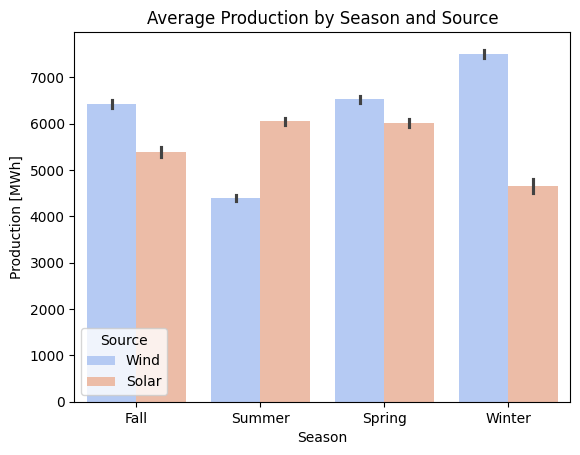

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

season_order = df.Season.unique()

sns.barplot(data = df,
            x = "Season",
            y = "Production",
            hue = "Source",
            palette="coolwarm",
            order=season_order)

plt.ylabel("Production [MWh]")
plt.title ("Average Production by Season and Source")

<Axes: xlabel='Source', ylabel='Production'>

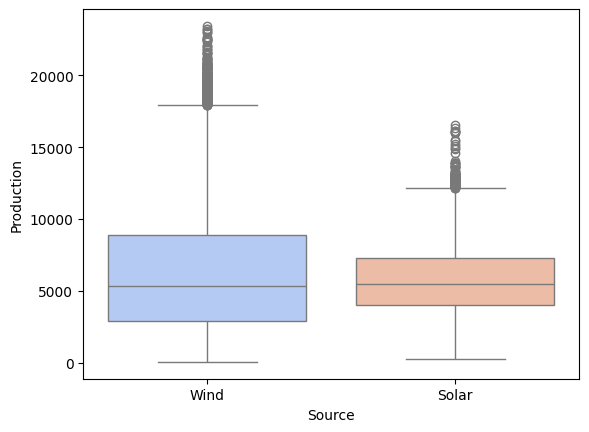

In [81]:
sns.boxplot(df,
            y = "Production",
            x = "Source",
            palette="coolwarm",
            hue = "Source",
            legend=False)

In [50]:
mean_prod = df[["Source", "Season","Production"]].groupby(["Source", "Season"]).mean()
mean_prod

Production
Source Season             
Solar  Fall    5386.830189
       Spring  6009.738123
       Summer  6044.805369
       Winter  4649.541547
Wind   Fall    6420.767782
       Spring  6525.051057
       Summer  4390.281212
       Winter  7504.270275

### Insight [TODO improve]

Talk about wind being better in winter and solar in summer which is expected. mention this is the average
because the dataset is unbalanced. Mention the total energy visualization.

### Grid stability

Text(0.5, 1.0, 'Average Production by Season and Source')

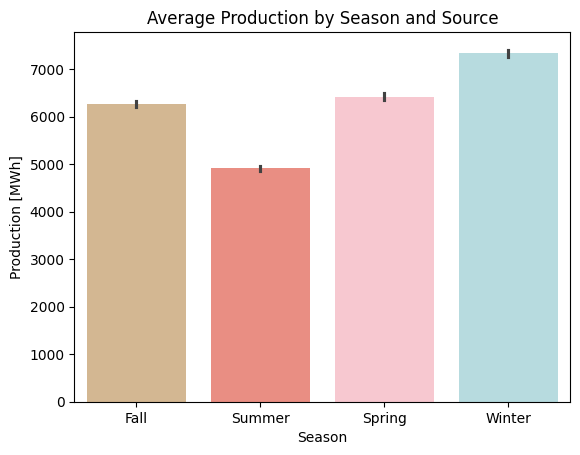

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Colors based on the temperature of the month
seasons_palette = {"Fall": "burlywood", "Winter": "powderblue", "Summer": "salmon", "Spring": "pink"}

sns.barplot(data = df,
            x = "Season",
            y = "Production",
            palette=seasons_palette,
            hue="Season",
            order=season_order)

plt.ylabel("Production [MWh]")
plt.title ("Average Production by Season and Source")

In [68]:
mean_prod_season = df[["Season","Production"]].groupby(["Season"]).mean()
mean_prod_season

,Production
Season,
Fall,6266.110908
Spring,6425.926969
Summer,4911.355779
Winter,7341.794684


### Insight [TODO: improve]: 
- Mean energy production for the summer is higher for solar, but we have more datapoints for wind, i.e. more powerplants. The surpluss of solar energy is not enought to balance the grid for the current proportion of solar/wind. 

## 2.  **Long-Term Trends:** 

Is there an observable year-over-year growth in total production capacity from 2020 to 2024? (Excluding the incomplete 2025 data to ensure fair comparison).

In [33]:
# Total Year Production by year and production source
df[["Year", "Source", "Production"]].groupby(["Year", "Source"]).agg(["sum", "mean", "median", "std"])

Production                                  
                   sum         mean  median          std
Year Source                                             
2020 Solar     4700080  3900.481328  3899.0  1296.497735
     Wind     42202441  5569.073766  4931.5  3425.617308
2021 Solar     6458219  4484.874306  4470.5  1643.173441
     Wind     39259471  5363.315710  4504.5  3591.438148
2022 Solar    10555892  5684.379106  5679.0  1963.833835
     Wind     39189831  5678.039844  4545.5  3929.231618
2023 Solar     9715845  6525.080591  6530.0  2220.664851
     Wind     53744024  7391.558795  6679.0  4682.096505
2024 Solar    10420592  6195.357907  6091.5  2446.135402
     Wind     48705535  6858.002675  5799.5  4747.794271
2025 Solar    12484057  7322.027566  7138.0  2682.526557
     Wind     44898926  7114.391697  6113.0  4480.914924

Text(0.5, 1.0, 'Total Production by Source from 2020-2025')

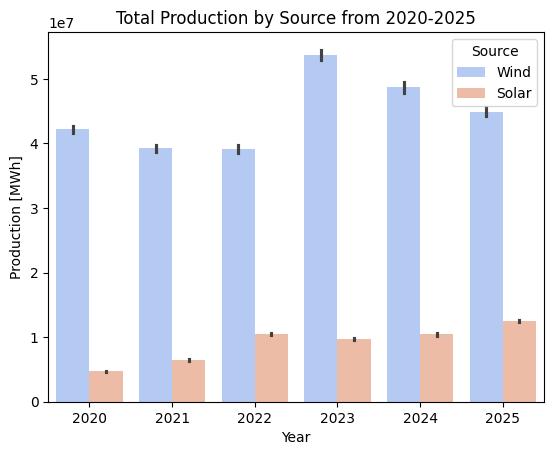

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data = df,
            x = "Year",
            y = "Production",
            hue = "Source",
            palette="coolwarm",
            estimator='sum')

plt.ylabel("Production [MWh]")
plt.title ("Total Production by Source from 2020-2025")

# Wind dominates dataset, so its normal it might have higher total production

Text(0.5, 1.0, 'Mean Production by Source from 2020-2025')

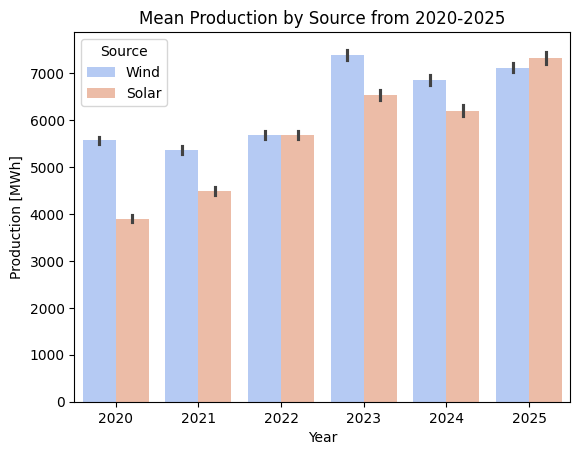

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data = df,
            x = "Year",
            y = "Production",
            hue = "Source",
            palette="coolwarm",
            estimator='mean')

plt.ylabel("Production [MWh]")
plt.title ("Mean Production by Source from 2020-2025")

# By mean production they are less different

Text(0.5, 1.0, 'Average Production by Season from 2020-2025')

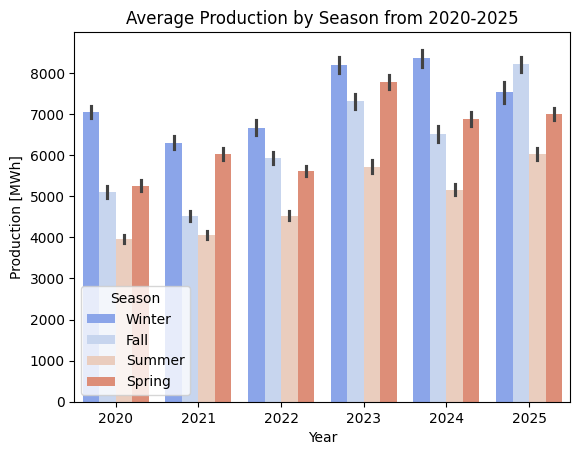

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data = df,
            x = "Year",
            y = "Production",
            hue = "Season",
            palette="coolwarm")

plt.ylabel("Production [MWh]")
plt.title ("Average Production by Season from 2020-2025")

Text(0.5, 1.0, 'Average Production by Season and Source')

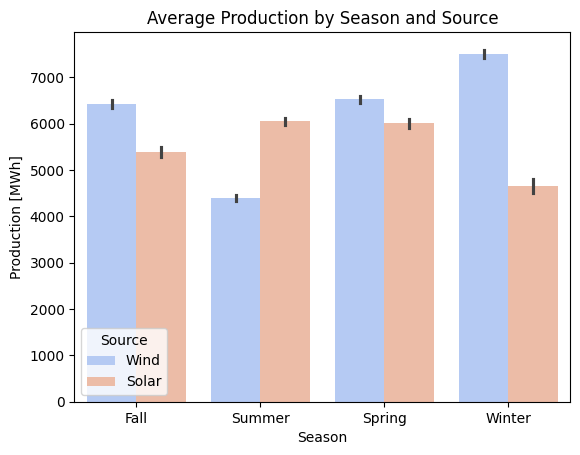